# Simply surfaces fitting

In [1]:
import numpy as np
import pandas as pd
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('GPU', tf.test.gpu_device_name(), 'configured')

GPU /device:GPU:0 configured


In [2]:
points = [
    (0, 0),
    (0.1, 0),
    (0.2, 0), 
    (0.5, 1),
    (0.6, 1),
    (0.55, 1),
    (0.8, 0),
    (0.83, 0),
    (0.9, 0)
]

data = np.array(points, dtype=float)

# Create the dataset
X = data[:, 0]
y = data[:, 1]

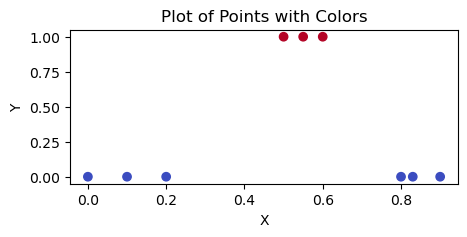

In [3]:
import matplotlib.pyplot as plt
# Plot the points with colors based on y-values
fig = plt.figure(figsize=(5, 2))
plt.scatter(X, y, c=y, cmap='coolwarm')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Points with Colors')
plt.show()

In [11]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(2, activation='softplus', input_shape=[1]),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

In [12]:
# Make predictions
y_pred = model.predict(X)
# Print the predictions
print(y_pred)

1/1 [==============================] - 0s 47ms/step
[[-0.25875163]
 [ 0.08210278]
 [ 0.38707042]
 [ 0.8852849 ]
 [ 0.8281983 ]
 [ 0.87420297]
 [ 0.27433658]
 [ 0.14192367]
 [-0.21078038]]


4/4 [==============================] - 0s 2ms/step


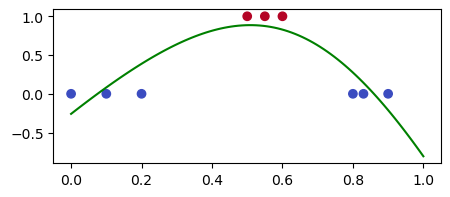

In [13]:
x_plot = np.linspace(0, 1, 100)
y_plot = model.predict(x_plot)

fig = plt.figure(figsize=(5, 2))
plt.scatter(X, y, c=y, cmap='coolwarm', label='Original Data')
plt.plot(x_plot, y_plot, color='green', label='Predicted Output')
plt.show()

In [14]:
from sklearn import metrics 
y_pred = np.where(y_pred > 0.5, 1, 0)
metrics.accuracy_score(y, y_pred)

1.0

Lets see the evolution of the loss value on time

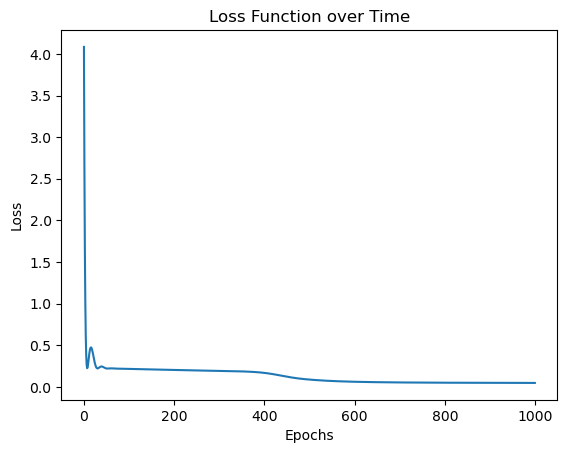

In [15]:
# Get the loss values from the training history
loss_values = history.history['loss']

# Plot the loss function over time
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function over Time')
plt.show()

## A little more complex example

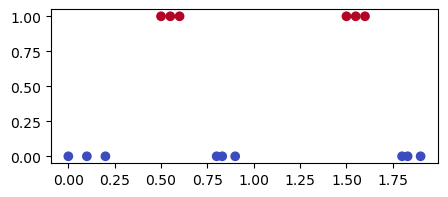

In [16]:
points = [
    (0, 0),
    (0.1, 0),
    (0.2, 0), 
    (0.5, 1),
    (0.6, 1),
    (0.55, 1),
    (0.8, 0),
    (0.83, 0),
    (0.9, 0),
    (1.5, 1),
    (1.6, 1),
    (1.55, 1),
    (1.8, 0),
    (1.83, 0),
    (1.9, 0)
]

data = np.array(points, dtype=float)

# Create the dataset
X = data[:, 0]
y = data[:, 1]

import matplotlib.pyplot as plt
# Plot the points with colors based on y-values
fig = plt.figure(figsize=(5, 2))
plt.scatter(X, y, c=y, cmap='coolwarm')

In [17]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(2, activation='softplus', input_shape=[1]),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Make predictions
y_pred = model.predict(X)

1/1 [==============================] - 0s 46ms/step


In [18]:
y_pred = np.where(y_pred > 0.5, 1, 0)
metrics.accuracy_score(y, y_pred)

0.6

4/4 [==============================] - 0s 2ms/step


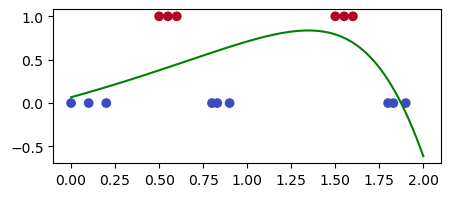

In [19]:
x_plot = np.linspace(0, 2, 100)
y_plot = model.predict(x_plot)

fig = plt.figure(figsize=(5, 2))
plt.scatter(X, y, c=y, cmap='coolwarm', label='Original Data')
plt.plot(x_plot, y_plot, color='green', label='Predicted Output')
plt.show()

The network was not able to deal with the complexity of the problem
- Probably underfited

We need to modify the network structure of the parameters in order to perform better

## More epochs

In [20]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(2, activation='softplus', input_shape=[1]),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=3000, verbose=0)

# Make predictions
y_pred = model.predict(X)

y_pred = np.where(y_pred > 0.5, 1, 0)
metrics.accuracy_score(y, y_pred)

1/1 [==============================] - 0s 49ms/step


0.6

It is not improving

Lets add more neurons to the layer

In [27]:
results = []
for neurons in range(2, 20, 3):
    # Define the model architecture
    model = keras.Sequential([
        keras.layers.Dense(neurons, activation='softplus', input_shape=[1]),
        keras.layers.Dense(1)
    ])

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    model.fit(X, y, epochs=1000, verbose=0)

    # Make predictions
    y_pred = model.predict(X)

    y_pred = np.where(y_pred > 0.5, 1, 0)
    acc = metrics.accuracy_score(y, y_pred)
    
    results.append((neurons, acc))
    
to_show = np.array(results)
plt.scatter(to_show[:,0], to_show[:,1])

1/1 [==============================] - 0s 48ms/step


Lets add one more layer

In [32]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='softplus', input_shape=[1]),
    keras.layers.Dense(10, activation='softplus'),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Make predictions
y_pred = model.predict(X)

y_pred = np.where(y_pred > 0.5, 1, 0)
metrics.accuracy_score(y, y_pred)

1/1 [==============================] - 0s 400ms/step


1.0

4/4 [==============================] - 0s 2ms/step


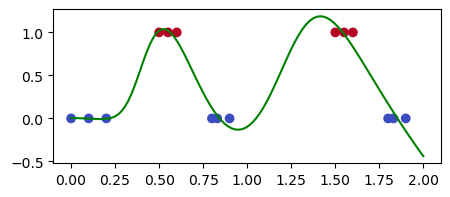

In [33]:
x_plot = np.linspace(0, 2, 100)
y_plot = model.predict(x_plot)

fig = plt.figure(figsize=(5, 2))
plt.scatter(X, y, c=y, cmap='coolwarm', label='Original Data')
plt.plot(x_plot, y_plot, color='green', label='Predicted Output')
plt.show()

Conclusion:
- Give me enough neurons and layers, enough epochs, and I will fit anything